**CSCI 36P Final Examination**

**Instructions:** This exam is designed to be completed in under three hours. If you need extra time due to accommodations, take that into account when you sit down to complete it. When you are finished, download as a .py file, change the name to 'final.py' if necessary, and upload to Gradescope.

The exam is to be done individually. You may use any resources to help you (textbook, internet, etc), EXCEPT for other people. Do not ask for help from classmates, parents, tutors, etc. Do not post questions about the exam on the internet.

You may upload to Gradescope multiple times. Gradescope will accept submissions until midnight PST. Absolutely no late submissions will be accepted.

As an affirmation that you will abide by these rules, enter your name here:

In [ ]:
Signature='Nina Leah Mizrahi'

We begin with the usual imports:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

For this exam, we will explore the `titanic` dataset, which gives the name, sex, age, and passenger class of each person on the Titanic, and whether or not they survived.  

In [ ]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')
titanic=titanic.rename(columns={'Unnamed: 0':'name'}).dropna()
titanic

,name,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st
...,...,...,...,...,...
1301,"Youseff, Mr. Gerious",no,male,45.5000,3rd
1304,"Zabour, Miss. Hileni",no,female,14.5000,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5000,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0000,3rd


**Question 1.**
Create a DataFrame called `manifest` with columns `Title`, `First`, `Last` and `Class`. Each entry in the `Class` column should be one of the integers 1, 2, or 3. For example, for the first row of the `manifest` DataFrame, the `Title` should be 'Miss.', `First` should be 'Elisabeth Walton', `Last` should be 'Allen', and `Class` should be the integer 1.


In [ ]:
titanic['name']=titanic.name.str.replace(',',' ')
titanic

,name,survived,sex,age,passengerClass
0,Allen Miss. Elisabeth Walton,yes,female,29.0000,1st
1,Allison Master. Hudson Trevor,yes,male,0.9167,1st
2,Allison Miss. Helen Loraine,no,female,2.0000,1st
3,Allison Mr. Hudson Joshua Crei,no,male,30.0000,1st
4,Allison Mrs. Hudson J C (Bessi,no,female,25.0000,1st
...,...,...,...,...,...
1301,Youseff Mr. Gerious,no,male,45.5000,3rd
1304,Zabour Miss. Hileni,no,female,14.5000,3rd
1306,Zakarian Mr. Mapriededer,no,male,26.5000,3rd
1307,Zakarian Mr. Ortin,no,male,27.0000,3rd


In [ ]:
manifest=(titanic.name.str.split(r'(M\w+\.)',expand=True).
    rename(columns={0:'Last',1:'Title',2:'First'}))
manifest['Class']=titanic.passengerClass.str.extract(r'(\d)')
manifest=manifest.assign(Class=lambda x:x.Class.astype(int))
manifest=manifest.loc[:,['Title','First','Last','Class']]
manifest

,Title,First,Last,Class
0,Miss.,Elisabeth Walton,Allen,1
1,Master.,Hudson Trevor,Allison,1
2,Miss.,Helen Loraine,Allison,1
3,Mr.,Hudson Joshua Crei,Allison,1
4,Mrs.,Hudson J C (Bessi,Allison,1
...,...,...,...,...
1301,Mr.,Gerious,Youseff,3
1304,Miss.,Hileni,Zabour,3
1306,Mr.,Mapriededer,Zakarian,3
1307,Mr.,Ortin,Zakarian,3


In [ ]:
#test=pd.DataFrame()
#test['Title']=titanic.name.str.extract(r'(M\w+\.)')
#test

**Question 2.**
The Titanic tragically sank on April 15th, 1912. Create a DataFrame called `birthdays` with columns `month` and `year`. The `month` column should contain the full month name and the `year` column the four digit year for each passenger's birth. Do this by converting each passengers `age` to a timedelta object, subtracting it from the date the Titanic sank, and then representing the resulting datetime object as specified.

*Important note:* For most (but not all!) passengers the `age` is recorded as a whole number of years. In these cases, the entry for the `month` column you will end up with in your `birthdays` DataFrame should be 'April'. However, some passengers (especially -- but not exclusively -- those less than one year old) have an age which also shows a fractional part of a year. At some point you should multiply each passenger's age by 12 to get the number of months, or 365 to get the number of days, that they were alive at the time of the Titanic tragedy.

In [ ]:
sank=pd.to_datetime('April 15, 1912')
sank

Timestamp('1912-04-15 00:00:00')

In [ ]:
q2=titanic.assign(age= lambda x:x['age']*-365)
q2=q2.assign(age=lambda x:x['age'].astype(int))
q2=q2.assign(age=lambda x:x['age'].astype(str))
q2=q2.assign(age=lambda x:x['age']+' day')
q2['age']=pd.to_timedelta(q2.age)
q2=q2.assign(age=lambda x:x['age']+sank)
q2

,name,survived,sex,age,passengerClass
0,Allen Miss. Elisabeth Walton,yes,female,1883-04-22,1st
1,Allison Master. Hudson Trevor,yes,male,1911-05-17,1st
2,Allison Miss. Helen Loraine,no,female,1910-04-16,1st
3,Allison Mr. Hudson Joshua Crei,no,male,1882-04-22,1st
4,Allison Mrs. Hudson J C (Bessi,no,female,1887-04-21,1st
...,...,...,...,...,...
1301,Youseff Mr. Gerious,no,male,1866-10-26,3rd
1304,Zabour Miss. Hileni,no,female,1897-10-18,3rd
1306,Zakarian Mr. Mapriededer,no,male,1885-10-21,3rd
1307,Zakarian Mr. Ortin,no,male,1885-04-21,3rd


In [ ]:
birthdays=pd.DataFrame()
birthdays['month']=q2['age'].apply(lambda x:x.strftime('%B'))
birthdays['year']=q2['age'].apply(lambda x:x.strftime('%Y'))
birthdays

,month,year
0,April,1883
1,May,1911
2,April,1910
3,April,1882
4,April,1887
...,...,...
1301,October,1866
1304,October,1897
1306,October,1885
1307,April,1885


**Question 3.**
When a ship sinks, they say women and children should get off first. In this question we will explore to what extent this happened when the Titanic sank.  

*Part 1.* Create a new DataFrame called `PassengerType` with columns `Type` and `Survived`. The `Survived` column should be identical to the `survived` column of the `titanic` DataFrame. The entries in the `Type` column should be:

1. 'child', if the corresponding passenger was under 18.
2. 'woman', if the passenger was 18 or older and female.
4. 'man', if the passenger was 18 or older and male.

In [ ]:
test=titanic
test=test[titanic.age<=18].sex.str.replace(r'\w+','child')
test

In [ ]:
test1=titanic
test1=test1[titanic.age>18].sex.str.replace(r'female','woman')
test1=test1.str.replace(r'male','man')
test1

In [ ]:
PassengerType=pd.DataFrame()
PassengerType['Type']=pd.concat([test,test1]).sort_index()
PassengerType['Survived']=titanic.survived
PassengerType

,Type,Survived
0,woman,yes
1,child,yes
2,child,no
3,man,no
4,woman,no
...,...,...
1301,man,no
1304,child,no
1306,man,no
1307,man,no


*Part 2.* Create a histogram with each passenger `Type` on the horizontal axis. For each such Type, there should be two side-by-side vertical bars showing how many of each passenger `Type` survived, and how many did not. Your histogram should look something like the one below, *although the heights of the bars in this sample image are (intentionally) wrong!*



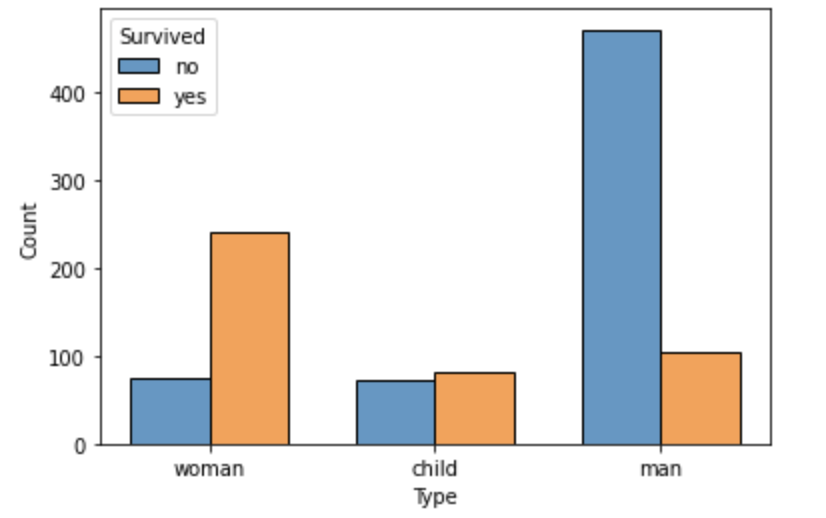

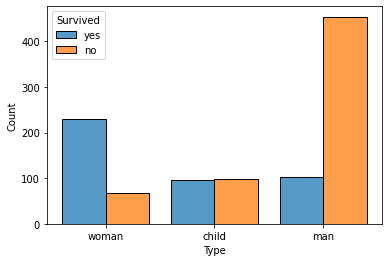

In [ ]:
fig,ax=plt.subplots()
ax=sns.histplot(data=PassengerType,x='Type',shrink=0.8,hue='Survived',multiple='dodge')


When you have completed your exam, click the "share" button at the top of the screen, and select General Access->"Anyone with the link". Then copy the link to your colab, and paste the address in the next code cell:

In [ ]:
YourColabAddress='https://colab.research.google.com/drive/1sdh_Dbf-QjKv45mddWjiU6mOcexfvEnN?usp=sharing'